In [6]:
import matplotlib.pyplot as plt
import numpy as np
import copy as cp

In [55]:
ens = {
    'A' : [(0,0), (1,0), (2,1), (4,0), (10, 0)],
    'B' : [(0,0), (3,0), (5,1), (6,0), (10, 0)]
}

In [22]:
def visualisation(dict):
    plt.figure()
    n = len(dict)
    fig, axs = plt.subplots(nrows=n, ncols=1)
    i = 0
    for key, value in dict.items():
        x = []
        y = []
        for pt in value:
            x.append(pt[0])
            y.append(pt[1])
        axs[i,].plot(x, y, label=key)
        axs[i,].legend(loc="upper right")
        i += 1

<Figure size 640x480 with 0 Axes>

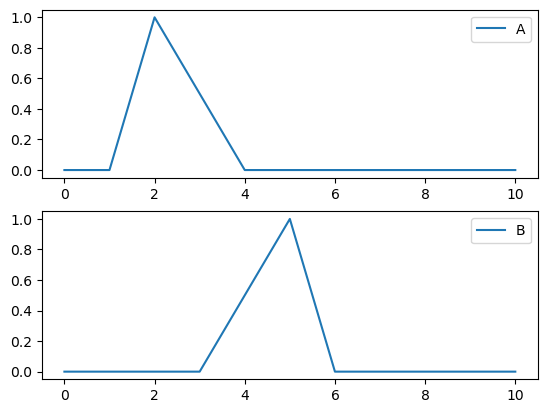

In [23]:
visualisation(ens)

In [94]:

def compute_membership(x, inflexion_points):
    for i in range(1, len(inflexion_points)):
        if x > inflexion_points[i][0]:
            continue
        else:
            m = (inflexion_points[i-1][1] - inflexion_points[i][1]) / (inflexion_points[i-1][0] - inflexion_points[i][0]) 
            b = inflexion_points[i][1] - m * inflexion_points[i][0]
            return m*x + b
        return 0
    
# def calculerDegreeAppartenance(x, ens):
#     if x == ens[len(ens)//2][0]:
#         return 1
#     inx = None
#     pt_prec = None
#     pt_suiv = None
#     for i in range(len(ens)):
#         if x > ens[i][0] and x<ens[i+1][0]:
#             pt_suiv = cp.deepcopy(ens[i+1])
#             pt_prec = cp.deepcopy(ens[i])
#             break
#     if not pt_prec or not pt_suiv:
#         return 0
#     y = np.array([pt_prec[1], pt_suiv[1]])
#     k = np.array([[pt_prec[0], 1], [pt_suiv[0], 1]])
#     res = np.linalg.solve(k,y)
#     a, b = res[0], res[1]   
#     return np.clip(a*x +b, a_min=0, a_max=1)

In [111]:
class T_norm(T):
    def __init__(self, type="probabiliste"):
        self.type = type
    
    def calculer(self, x ,y):
        if self.type == "probabiliste":
            return x*y
        if self.type == "lukasiewicz":
            return max(x+y-1,0)
        if self.type == "zadeh":
            return min(x, y)
        if self.type == "hamacher":
            if x == y and x == 0:
                return 0
            return (x*y)/(x+y-x*y)
        if self.type == "drastique":
            if x == 1:
                return y
            if y == 1:
                return x
            return 0

In [101]:
class FonctionImplication:
    def __init__(self, type="lukasiewicz"):
        self.type = type
 
    def calculer(self, x, y):
        if self.type == 'lukasiewicz':
            return min(1 - x + y, 1 )
        elif self.type == 'kleene-dienes':
            return max(1 - x, y)
        elif self.type == 'reichenbach':
            return 1 - x + x * y
        elif self.type == 'willmott':
            return max(1-x, min(x,y))
        elif self.type == 'brouwer-godel':
            return 1 if x < y else y
        elif self.type == 'goguen':
            return 1 if x == 0 else min(y/x, 1)
        elif self.type == 'rescher-gaines':
            return 1 if x <= y else 0
        else:
            return None

$f_{B'}(y) = \text{op}(f_A(x_0), f_B(y))$

In [104]:
def bonjour(ensA, ensB, x0, op="lukasiewicz"):
    FImplication = FonctionImplication(type=op)
    fA_x0 = compute_membership(x0, ensA)
    interval_B = np.linspace(ensB[0][0], ensB[-1][0], 100)
    # visualiser B
    x = []
    y = []
    for pt in ensB:
        x.append(pt[0])
        y.append(pt[1])
    plt.plot(x, y, label="B")
    # calculer fB_prime_y
    fB_prime_y = np.zeros_like(interval_B)
    for i in range(len(interval_B)):
        fB_prime_y[i] = FImplication.calculer(fA_x0,compute_membership(interval_B[i], ensB))
    plt.plot(interval_B, fB_prime_y, label="f_B_prime")
    plt.legend(loc="upper right")
    plt.title(f"x0 = {x0} - operateur {op}")
    plt.show()

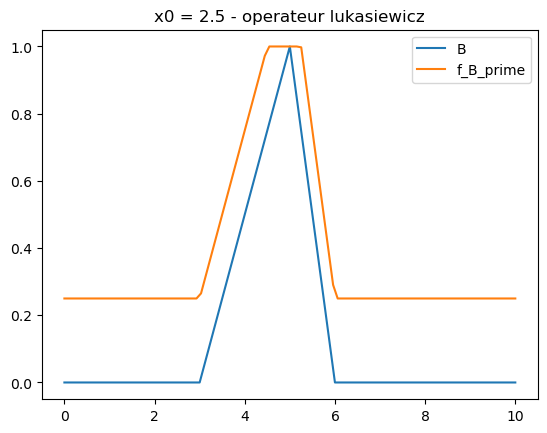

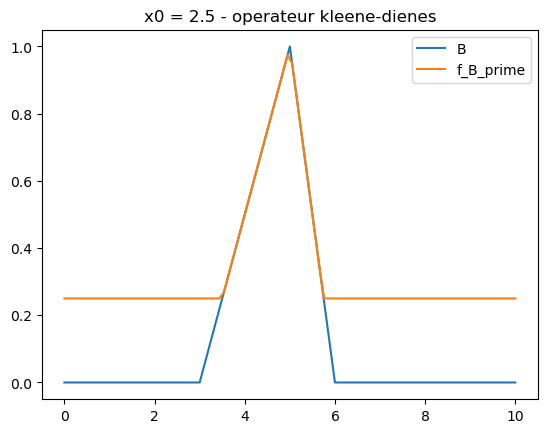

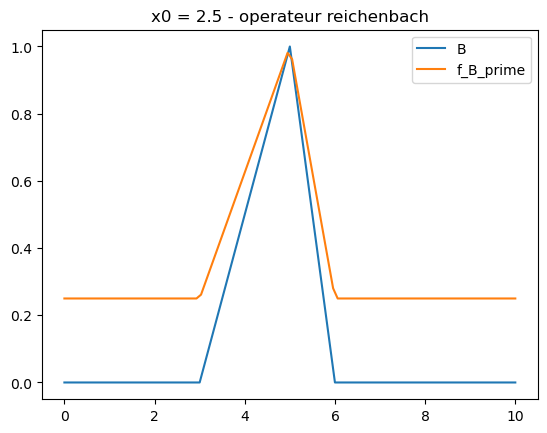

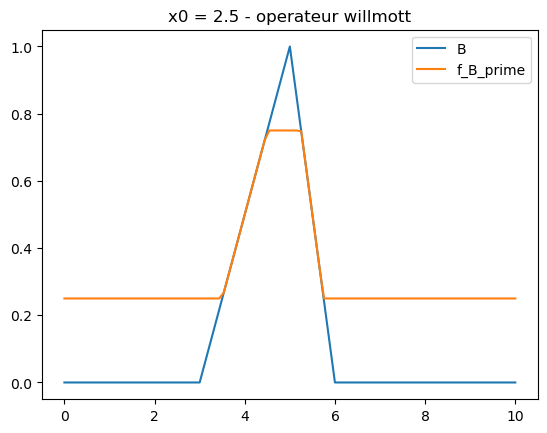

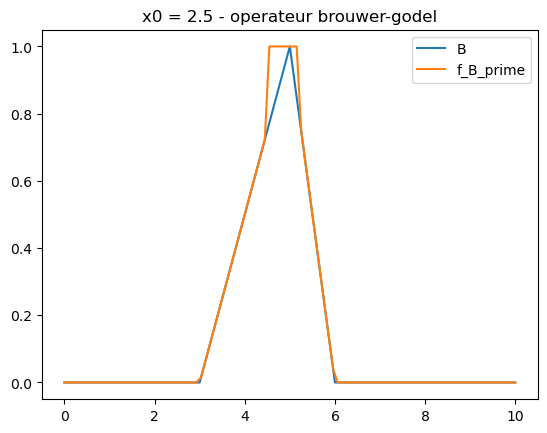

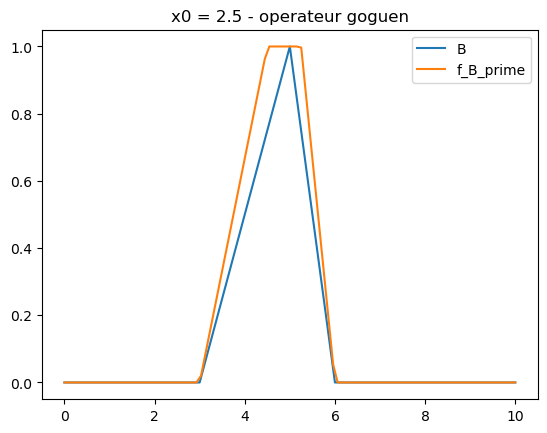

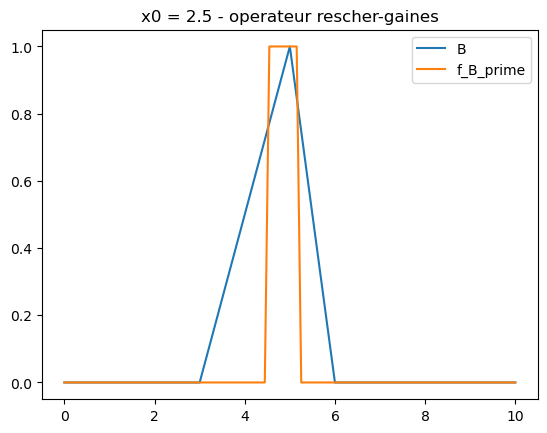

In [108]:
x0_liste = [2.5, 3, 3.5, 6, 2]
op_liste = ['lukasiewicz','kleene-dienes','reichenbach','willmott','brouwer-godel','goguen','rescher-gaines']
for x0 in x0_liste[:1]:
    for op in op_liste:
        bonjour(ensA=ens['A'], ensB=ens['B'], x0=x0, op=op)

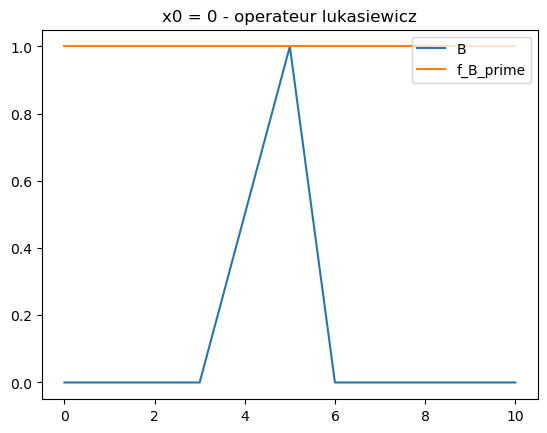

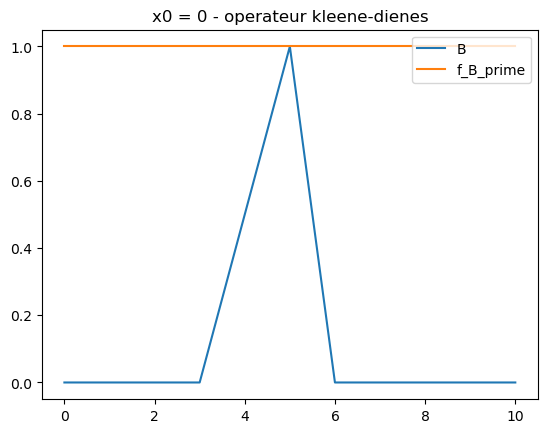

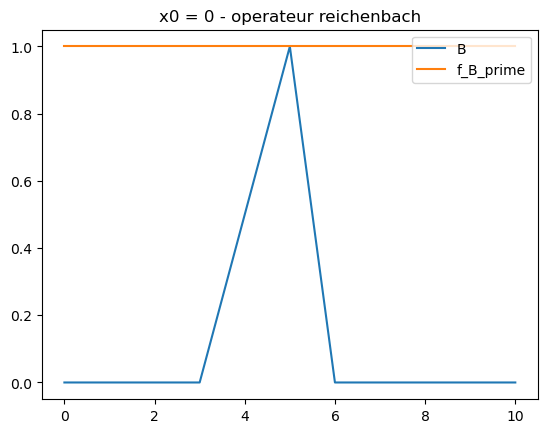

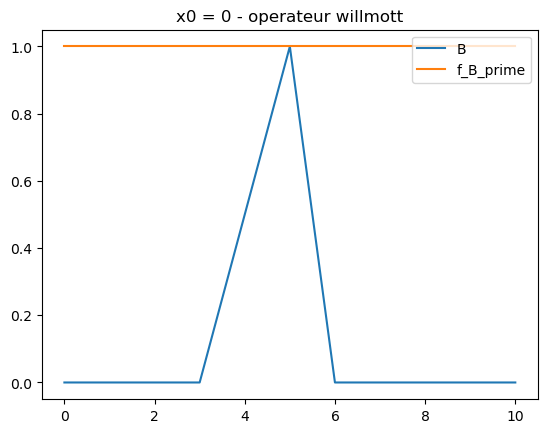

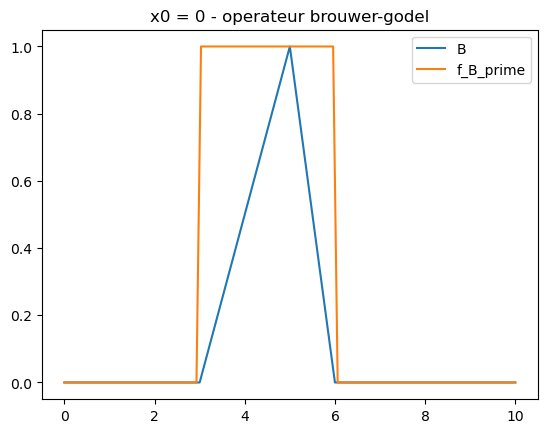

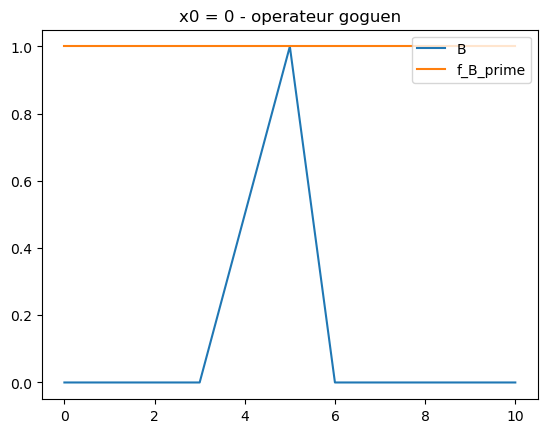

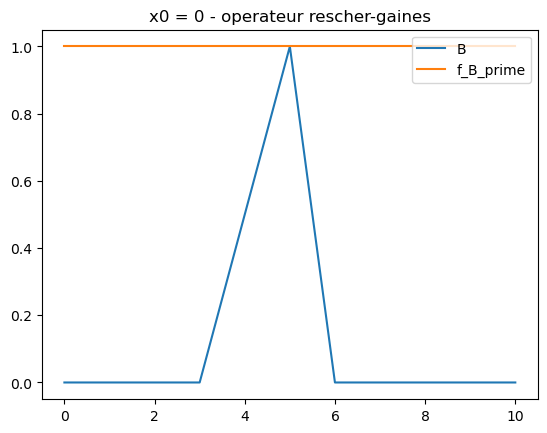

In [109]:
op_liste = ['lukasiewicz','kleene-dienes','reichenbach','willmott','brouwer-godel','goguen','rescher-gaines']
for op in op_liste:
    bonjour(ensA=ens['A'], ensB=ens['B'], x0=0, op=op)

for y in Y for x in X

In [110]:
def seuil(x, seuil = 0.4):
    return int(x>seuil)

liste y avec son meilleur x
-> visualiser

In [ ]:
def aurevoir(ensA, ensB, f_a, op="lukasiewicz"):
    FImplication = FonctionImplication(type=op)
    interval_Y = np.linspace(ensB[0][0], ensB[-1][0], 100)
    interval_X = np.linspace(ensA[0][0], ensA[-1][0], 100)
    # visualiser B
    x = []
    y = []
    for pt in ensB:
        x.append(pt[0])
        y.append(pt[1])
    plt.plot(x, y, label="B")



    # calculer fB_prime_y
    fB_prime_y = np.zeros_like(interval_Y)
    meilleur = -1
    for i in range(len(interval_Y)):
        for j in range(len(interval_X)):
            x = interval_X[j]
            fa_x = compute_membership(x, ensA)
            fb_y = compute_membership(interval_Y[i], ensB)
            fa_prime = f_a(x)
            
            machin = FImplication.calculer(fa_x,fb_y)
            resultat = Tnorm(fa_prime, machin)
            if resultat > meilleur:
                meilleur = resultat
                sauvegarder(x)
                
    plt.plot(interval_B, fB_prime_y, label="f_B_prime")
    plt.legend(loc="upper right")
    plt.title(f"x0 = {x0} - operateur {op}")
    plt.show()